In [1]:
import sklearn
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import graphviz
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score , recall_score, f1_score, roc_curve, roc_auc_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.tree import export_graphviz
from sklearn.ensemble import GradientBoostingClassifier
import warnings
import time
warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
test_df = pd.read_csv('./adult2.data_converted.csv')
#test_df.drop(32561, axis=0, inplace=True)

In [3]:
test_df.head(10)

,age,work-class,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,is_more_than_50K
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,0
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,0
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,0
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,0
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,0
5,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,0
6,49,Private,160187,9th,5,Married-spouse-absent,Other-service,Not-in-family,Black,Female,0,0,16,Jamaica,0
7,52,Self-emp-not-inc,209642,HS-grad,9,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,45,United-States,1
8,31,Private,45781,Masters,14,Never-married,Prof-specialty,Not-in-family,White,Female,14084,0,50,United-States,1
9,42,Private,159449,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,5178,0,40,United-States,1


In [4]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   age               32561 non-null  int64 
 1   work-class        32561 non-null  object
 2   fnlwgt            32561 non-null  int64 
 3   education         32561 non-null  object
 4   education-num     32561 non-null  int64 
 5   marital-status    32561 non-null  object
 6   occupation        32561 non-null  object
 7   relationship      32561 non-null  object
 8   race              32561 non-null  object
 9   sex               32561 non-null  object
 10  capital-gain      32561 non-null  int64 
 11  capital-loss      32561 non-null  int64 
 12  hours-per-week    32561 non-null  int64 
 13  native-country    32561 non-null  object
 14  is_more_than_50K  32561 non-null  int64 
dtypes: int64(7), object(8)
memory usage: 3.7+ MB


In [5]:
print('데이터 세트 Null 값 갯수 \n',test_df.isnull().sum())

데이터 세트 Null 값 갯수 
 age                 0
work-class          0
fnlwgt              0
education           0
education-num       0
marital-status      0
occupation          0
relationship        0
race                0
sex                 0
capital-gain        0
capital-loss        0
hours-per-week      0
native-country      0
is_more_than_50K    0
dtype: int64


In [6]:
test_df.drop(['education','native-country','fnlwgt'], axis=1, inplace=True)

In [7]:
test_df_dropna = test_df#.dropna(axis = 0)

In [8]:
print('데이터 세트 Null 값 갯수 \n',test_df_dropna.isnull().sum())

데이터 세트 Null 값 갯수 
 age                 0
work-class          0
education-num       0
marital-status      0
occupation          0
relationship        0
race                0
sex                 0
capital-gain        0
capital-loss        0
hours-per-week      0
is_more_than_50K    0
dtype: int64


In [9]:
test_df_dropna.head(10)

,age,work-class,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,is_more_than_50K
0,39,State-gov,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,0
1,50,Self-emp-not-inc,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,0
2,38,Private,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,0
3,53,Private,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,0
4,28,Private,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,0
5,37,Private,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,0
6,49,Private,5,Married-spouse-absent,Other-service,Not-in-family,Black,Female,0,0,16,0
7,52,Self-emp-not-inc,9,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,45,1
8,31,Private,14,Never-married,Prof-specialty,Not-in-family,White,Female,14084,0,50,1
9,42,Private,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,5178,0,40,1


## 각 칼럼별 50K이상인 사람 히스토그램

<AxesSubplot:xlabel='age', ylabel='is_more_than_50K'>

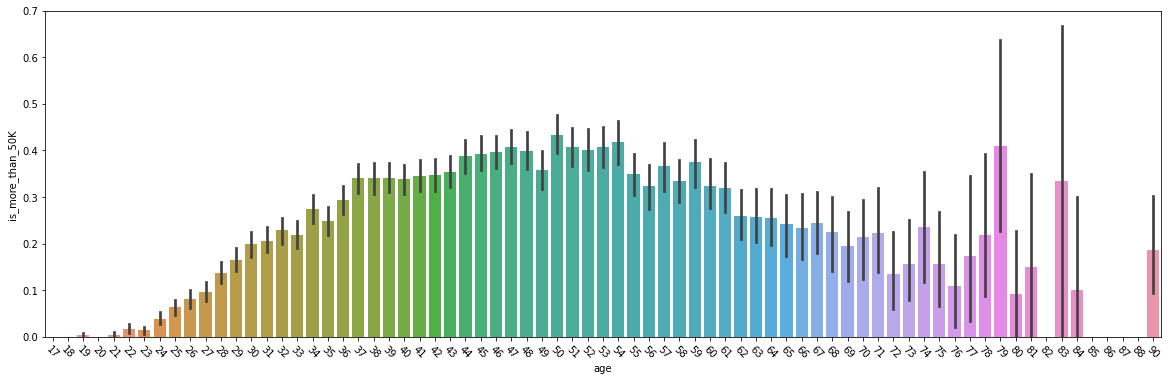

In [10]:
plt.figure(figsize=(20, 6))
plt.xticks(rotation = - 45 )
sns.barplot(x='age', y = 'is_more_than_50K', data=test_df_dropna)

<AxesSubplot:xlabel='work-class', ylabel='is_more_than_50K'>

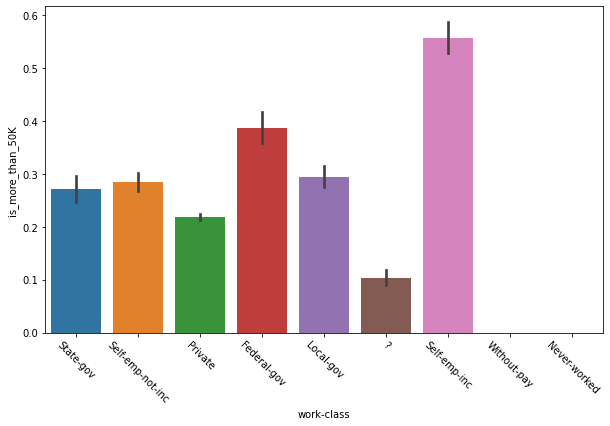

In [11]:
plt.figure(figsize=(10, 6))
plt.xticks(rotation = - 45 )
sns.barplot(x='work-class', y = 'is_more_than_50K', data=test_df_dropna)

<AxesSubplot:xlabel='education-num', ylabel='is_more_than_50K'>

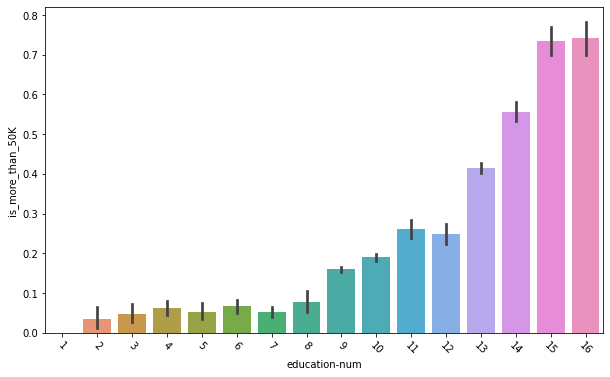

In [12]:
plt.figure(figsize=(10, 6))
plt.xticks(rotation = - 45)
sns.barplot(x='education-num', y = 'is_more_than_50K', data=test_df_dropna)

<AxesSubplot:xlabel='marital-status', ylabel='is_more_than_50K'>

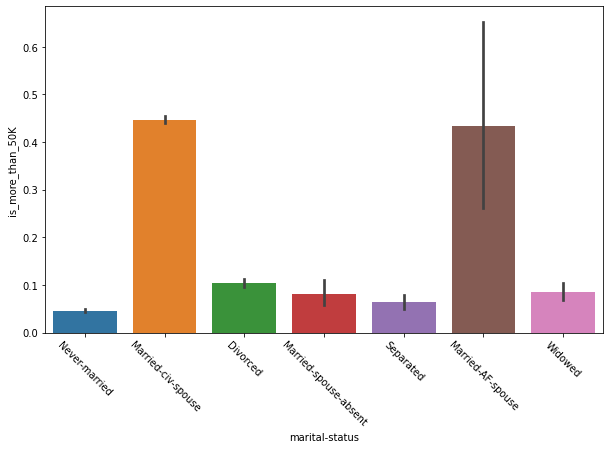

In [13]:
plt.figure(figsize=(10, 6))
plt.xticks(rotation = - 45 )
sns.barplot(x='marital-status', y = 'is_more_than_50K', data=test_df_dropna)

<AxesSubplot:xlabel='occupation', ylabel='is_more_than_50K'>

<Figure size 720x432 with 0 Axes>

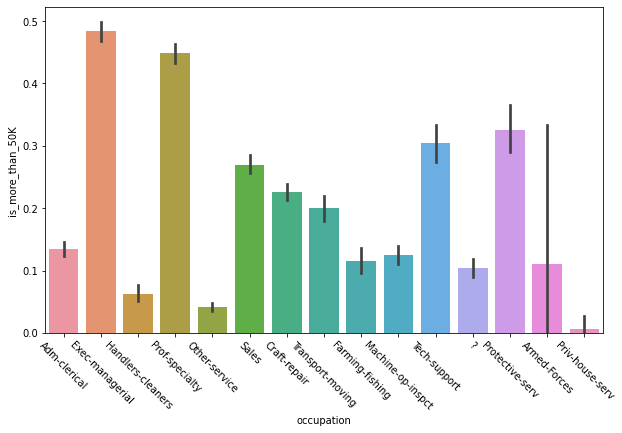

In [14]:
plt.figure(figsize=(10, 6))
plt.figure(figsize=(10, 6))
plt.xticks(rotation = - 45)
sns.barplot(x='occupation', y = 'is_more_than_50K', data=test_df_dropna)

<AxesSubplot:xlabel='relationship', ylabel='is_more_than_50K'>

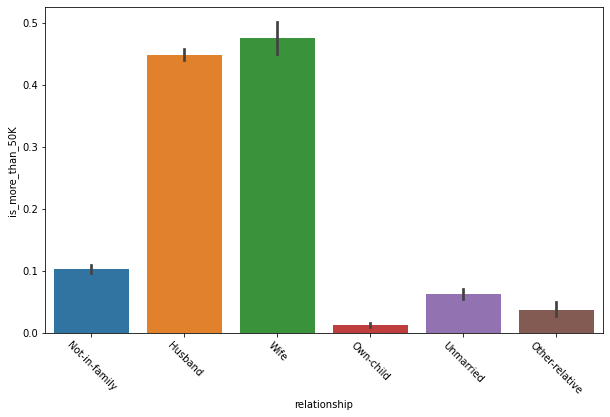

In [15]:
plt.figure(figsize=(10, 6))
plt.xticks(rotation = - 45 )
sns.barplot(x='relationship', y = 'is_more_than_50K', data=test_df_dropna)

<AxesSubplot:xlabel='race', ylabel='is_more_than_50K'>

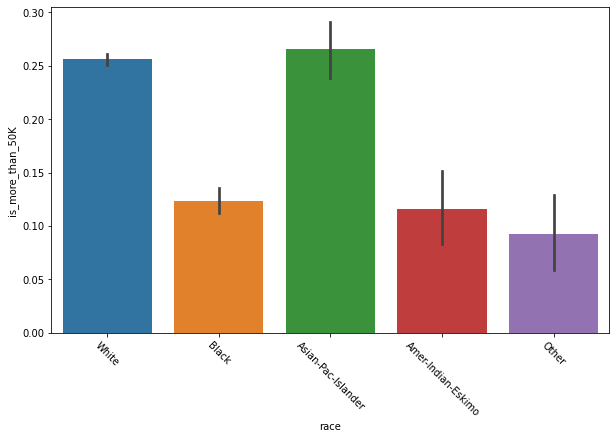

In [16]:
plt.figure(figsize=(10, 6))
plt.xticks(rotation = - 45 )
sns.barplot(x='race', y = 'is_more_than_50K', data=test_df_dropna)

<AxesSubplot:xlabel='sex', ylabel='is_more_than_50K'>

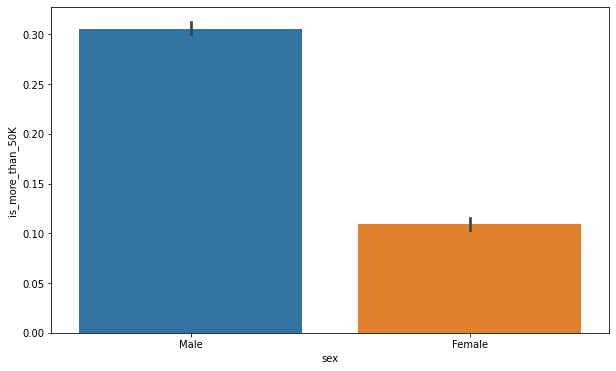

In [17]:
plt.figure(figsize=(10, 6))
sns.barplot(x='sex', y = 'is_more_than_50K', data=test_df_dropna)

<AxesSubplot:xlabel='hours-per-week', ylabel='is_more_than_50K'>

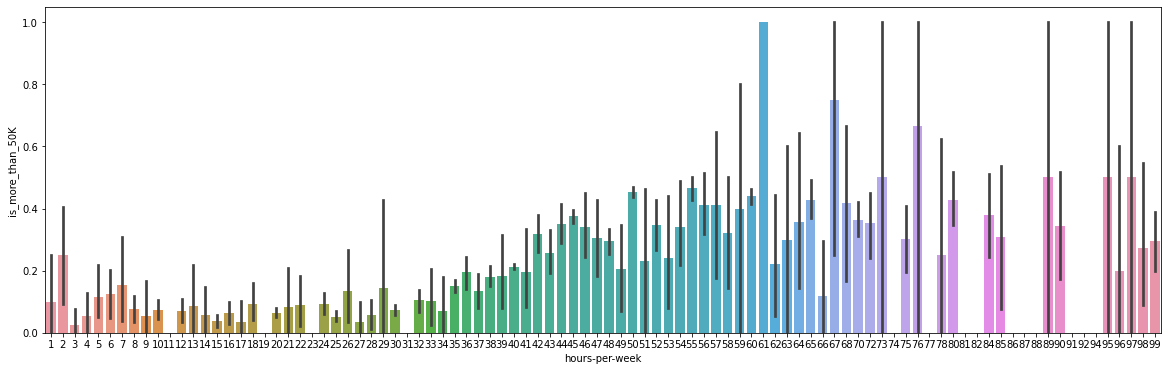

In [18]:
plt.figure(figsize=(20, 6))
sns.barplot(x='hours-per-week', y = 'is_more_than_50K', data=test_df_dropna)

In [19]:
def encode_features(dataDF):
    features = test_df_dropna.columns
    for feature in features:
        le = preprocessing.LabelEncoder()
        le = le.fit(dataDF[feature])
        dataDF[feature] = le.transform(dataDF[feature])
        
    return dataDF

test_df_dropna = encode_features(test_df_dropna)
test_df_dropna.head(10)

,age,work-class,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,is_more_than_50K
0,22,7,12,4,1,1,4,1,25,0,39,0
1,33,6,12,2,4,0,4,1,0,0,12,0
2,21,4,8,0,6,1,4,1,0,0,39,0
3,36,4,6,2,6,0,2,1,0,0,39,0
4,11,4,12,2,10,5,2,0,0,0,39,0
5,20,4,13,2,4,5,4,0,0,0,39,0
6,32,4,4,3,8,1,2,0,0,0,15,0
7,35,6,8,2,4,0,4,1,0,0,44,1
8,14,4,13,4,10,1,4,0,105,0,49,1
9,25,4,12,2,4,0,4,1,79,0,39,1


In [20]:
test_df_dropna.head(10)

,age,work-class,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,is_more_than_50K
0,22,7,12,4,1,1,4,1,25,0,39,0
1,33,6,12,2,4,0,4,1,0,0,12,0
2,21,4,8,0,6,1,4,1,0,0,39,0
3,36,4,6,2,6,0,2,1,0,0,39,0
4,11,4,12,2,10,5,2,0,0,0,39,0
5,20,4,13,2,4,5,4,0,0,0,39,0
6,32,4,4,3,8,1,2,0,0,0,15,0
7,35,6,8,2,4,0,4,1,0,0,44,1
8,14,4,13,4,10,1,4,0,105,0,49,1
9,25,4,12,2,4,0,4,1,79,0,39,1


In [21]:
y_test_df = test_df_dropna['is_more_than_50K']
X_test_df= test_df_dropna.drop('is_more_than_50K',axis=1)

In [22]:
y_test_df.head()

0    0
1    0
2    0
3    0
4    0
Name: is_more_than_50K, dtype: int64

In [23]:
X_test_df.head()

,age,work-class,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week
0,22,7,12,4,1,1,4,1,25,0,39
1,33,6,12,2,4,0,4,1,0,0,12
2,21,4,8,0,6,1,4,1,0,0,39
3,36,4,6,2,6,0,2,1,0,0,39
4,11,4,12,2,10,5,2,0,0,0,39


In [24]:
X_train, X_test, y_train, y_test=train_test_split(X_test_df, y_test_df, \
                                                  test_size=0.3, random_state=12)

## 각 모듈당 한 번씩만 돌려본 것

In [25]:
# 결정트리, Random Forest, 로지스틱 회귀를 위한 사이킷런 Classifier 클래스 생성
dt_clf = DecisionTreeClassifier(random_state=11)
rf_clf = RandomForestClassifier(random_state=11)
lr_clf = LogisticRegression()

# DecisionTreeClassifier 학습/예측/평가
dt_clf.fit(X_train , y_train)
dt_pred = dt_clf.predict(X_test)
print('DecisionTreeClassifier 정확도: {0:.4f}'.format(accuracy_score(y_test, dt_pred)))
print('DecisionTreeClassifier 정밀도: {0:.4f}'.format(precision_score(y_test, dt_pred)))
print('DecisionTreeClassifier 재현도: {0:.4f}'.format(recall_score(y_test, dt_pred)))
print('DecisionTreeClassifier f1스코어: {0:.4f}'.format(f1_score(y_test, dt_pred)))
print()

# RandomForestClassifier 학습/예측/평가
rf_clf.fit(X_train , y_train)
rf_pred = rf_clf.predict(X_test)
print('RandomForestClassifier 정확도:{0:.4f}'.format(accuracy_score(y_test, rf_pred)))
print('RandomForestClassifier 정밀도: {0:.4f}'.format(precision_score(y_test, rf_pred)))
print('RandomForestClassifier 재현도: {0:.4f}'.format(recall_score(y_test, rf_pred)))
print('RandomForestClassifier f1스코어: {0:.4f}'.format(f1_score(y_test, rf_pred)))
print()

# LogisticRegression 학습/예측/평가
lr_clf.fit(X_train , y_train)
lr_pred = lr_clf.predict(X_test)
print('LogisticRegression 정확도: {0:.4f}'.format(accuracy_score(y_test, lr_pred)))
print('LogisticRegression 정밀도: {0:.4f}'.format(precision_score(y_test, lr_pred)))
print('LogisticRegression 재현도: {0:.4f}'.format(recall_score(y_test, lr_pred)))
print('LogisticRegression f1스코어: {0:.4f}'.format(f1_score(y_test, lr_pred)))

DecisionTreeClassifier 정확도: 0.8152
DecisionTreeClassifier 정밀도: 0.6216
DecisionTreeClassifier 재현도: 0.6125
DecisionTreeClassifier f1스코어: 0.6170

RandomForestClassifier 정확도:0.8480
RandomForestClassifier 정밀도: 0.7174
RandomForestClassifier 재현도: 0.6179
RandomForestClassifier f1스코어: 0.6640

LogisticRegression 정확도: 0.8212
LogisticRegression 정밀도: 0.7080
LogisticRegression 재현도: 0.4495
LogisticRegression f1스코어: 0.5499


## Decision Tree

In [26]:
scores = cross_val_score(dt_clf, X_test_df , y_test_df , cv=5)
for iter_count,accuracy in enumerate(scores):
    print("교차 검증 {0} 정확도: {1:.4f}".format(iter_count, accuracy))

print("평균 정확도: {0:.4f}".format(np.mean(scores)))

교차 검증 0 정확도: 0.8065
교차 검증 1 정확도: 0.8070
교차 검증 2 정확도: 0.8123
교차 검증 3 정확도: 0.8162
교차 검증 4 정확도: 0.8177
평균 정확도: 0.8120


In [27]:
# export_graphviz()의 호출 결과로 out_file로 지정된 tree.dot 파일을 생성함. 
export_graphviz(dt_clf,out_file="tree.dot", max_depth=4, impurity=True, filled=True, feature_names = X_test_df.columns)

In [28]:
# 위에서 생성된 tree.dot 파일을 Graphviz 읽어서 Jupyter Notebook상에서 시각화 
with open("tree.dot") as f:
    dot_graph = f.read()
graphviz.Source(dot_graph)

ExecutableNotFound: failed to execute ['dot', '-Kdot', '-Tsvg'], make sure the Graphviz executables are on your systems' PATH

In [29]:
parameters = {'max_depth':[2,3,5,10],
             'min_samples_split':[2,3,5], 'min_samples_leaf':[1,2,5,8]}

grid_dclf = GridSearchCV(dt_clf , param_grid=parameters , scoring='accuracy' , cv=5)
grid_dclf.fit(X_train , y_train)

print('GridSearchCV 최적 하이퍼 파라미터 :',grid_dclf.best_params_)
print('GridSearchCV 최고 정확도: {0:.4f}'.format(grid_dclf.best_score_))
best_dclf = grid_dclf.best_estimator_

# GridSearchCV의 최적 하이퍼 파라미터로 학습된 Estimator로 예측 및 평가 수행. 
dpredictions = best_dclf.predict(X_test)
accuracy = accuracy_score(y_test , dpredictions)
print('테스트 세트에서의 DecisionTreeClassifier 정확도 : {0:.4f}'.format(accuracy))

GridSearchCV 최적 하이퍼 파라미터 : {'max_depth': 10, 'min_samples_leaf': 5, 'min_samples_split': 2}
GridSearchCV 최고 정확도: 0.8535
테스트 세트에서의 DecisionTreeClassifier 정확도 : 0.8547


In [30]:
# GridSearchCV의 refit으로 이미 학습이 된 estimator 반환
estimator = grid_dclf.best_estimator_

# GridSearchCV의 best_estimator_는 이미 최적 하이퍼 파라미터로 학습이 됨
pred = estimator.predict(X_test)
print('테스트 데이터 세트 정확도: {0:.5f}'.format(accuracy_score(y_test,pred)))
print('테스트 데이터 세트 정밀도: {0:.5f}'.format(precision_score(y_test,pred)))
print('테스트 데이터 세트 재현율: {0:.5f}'.format(recall_score(y_test,pred)))
print('테스트 데이터 세트 f1스코어: {0:.5f}'.format(f1_score(y_test,pred)))
print('테스트 데이터 세트 roc_auc_스코어: {0:.5f}'.format(roc_auc_score(y_test,pred)))

테스트 데이터 세트 정확도: 0.85474
테스트 데이터 세트 정밀도: 0.74153
테스트 데이터 세트 재현율: 0.61752
테스트 데이터 세트 f1스코어: 0.67387
테스트 데이터 세트 roc_auc_스코어: 0.77421


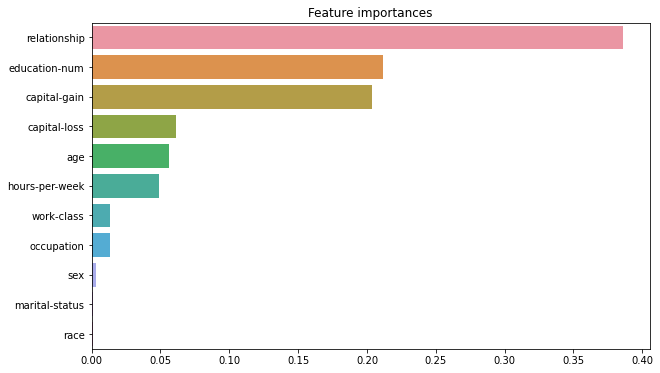

In [31]:
ftr_importances_values = estimator.feature_importances_
# Top 중요도로 정렬을 쉽게 하고, 시본(Seaborn)의 막대그래프로 쉽게 표현하기 위해 Series변환
ftr_importances = pd.Series(ftr_importances_values, index=X_train.columns  )
# 중요도값 순으로 Series를 정렬
ftr_top = ftr_importances.sort_values(ascending=False)
plt.figure(figsize=(10,6))
plt.title('Feature importances')
sns.barplot(x=ftr_top , y = ftr_top.index)
plt.show()

## 랜덤포레스트

In [32]:
params = {
    'n_estimators':[100],
    'max_depth' : [6, 8, 10, 12], 
    'min_samples_leaf' : [8, 12, 18 ],
    'min_samples_split' : [8, 16, 20]
}
# RandomForestClassifier 객체 생성 후 GridSearchCV 수행
rf_clf = RandomForestClassifier(random_state=0, n_jobs=-1)
grid_cv = GridSearchCV(rf_clf , param_grid=params , cv=2, n_jobs=-1 )
grid_cv.fit(X_train , y_train)

print('최적 하이퍼 파라미터:\n', grid_cv.best_params_)
print('최고 예측 정확도: {0:.4f}'.format(grid_cv.best_score_))

최적 하이퍼 파라미터:
 {'max_depth': 12, 'min_samples_leaf': 8, 'min_samples_split': 20, 'n_estimators': 100}
최고 예측 정확도: 0.8603


In [33]:
estimator = grid_cv.best_estimator_

# GridSearchCV의 best_estimator_는 이미 최적 하이퍼 파라미터로 학습이 됨
pred = estimator.predict(X_test)
print('예측 정확도: {0:.4f}'.format(accuracy_score(y_test , pred)))
print('예측 정밀도: {0:.5f}'.format(precision_score(y_test,pred)))
print('예측 재현율: {0:.5f}'.format(recall_score(y_test,pred)))
print('예측 f1스코어: {0:.5f}'.format(f1_score(y_test,pred)))
print('예측 roc_auc_스코어: {0:.5f}'.format(roc_auc_score(y_test,pred)))

예측 정확도: 0.8616
예측 정밀도: 0.78579
예측 재현율: 0.59183
예측 f1스코어: 0.67516
예측 roc_auc_스코어: 0.77002


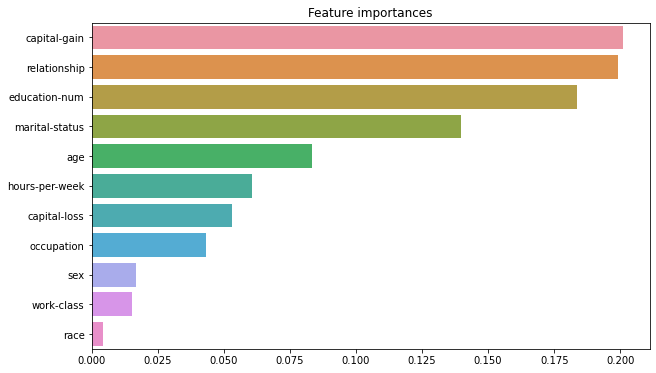

In [34]:
ftr_importances_values = estimator.feature_importances_
ftr_importances = pd.Series(ftr_importances_values,index=X_train.columns)
ftr_top = ftr_importances.sort_values(ascending=False)

plt.figure(figsize=(10,6))
plt.title('Feature importances')
sns.barplot(x=ftr_top , y = ftr_top.index)
plt.show()

In [35]:
start_time = time.time()
gb_clf = GradientBoostingClassifier(random_state = 0)
gb_clf.fit(X_train, y_train)
gb_pred = gb_clf.predict(X_test)
gb_accuracy = accuracy_score(y_test,gb_pred)

print('예측 정확도: {0:.4f}'.format(gb_accuracy))
print('수행시간: {0:.4f}s'.format(time.time() - start_time))

예측 정확도: 0.8652
수행시간: 3.4861s


In [36]:
params = {
    'n_estimaters':[100,500],
    'learning_rate':[0.05,0.1]
}
grid_cv = GridSearchCV(gb_clf , param_grid=params , cv=2, verbose=1 )
grid_cv.fit(X_train , y_train)

print('최적 하이퍼 파라미터:\n', grid_cv.best_params_)
print('최고 예측 정확도: {0:.4f}'.format(grid_cv.best_score_))

Fitting 2 folds for each of 4 candidates, totalling 8 fits


ValueError: Invalid parameter n_estimaters for estimator GradientBoostingClassifier(learning_rate=0.05, random_state=0). Check the list of available parameters with `estimator.get_params().keys()`.